In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings

warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
print("ROSSMANN STORE SALES - EXPLORATORY DATA ANALYSIS")
print("=" * 60)

print("\n1. LOADING DATASETS...")
try:
    train_df = pd.read_csv('../data/raw/train.csv')
    store_df = pd.read_csv('../data/raw/store.csv')
    test_df = pd.read_csv('../data/raw/test.csv')
    
    print(f"Train data shape: {train_df.shape}")
    print(f"Store data shape: {store_df.shape}")
    print(f"Test data shape: {test_df.shape}")
except FileNotFoundError:
    print("Files not found. Please ensure the following files are in '../data/raw/':")
    print("   - train.csv")
    print("   - store.csv") 
    print("   - test.csv")


ROSSMANN STORE SALES - EXPLORATORY DATA ANALYSIS

1. LOADING DATASETS...
Train data shape: (1017209, 9)
Store data shape: (1115, 10)
Test data shape: (41088, 8)


In [6]:
# Basic data exploration
print("\n2. BASIC DATA EXPLORATION...")
print("\nTrain Dataset Info:")
print(train_df.info())

print("\nStore Dataset Info:")
print(store_df.info())

print("\nFirst 5 rows of training data:")
print(train_df.head())

print("\nFirst 5 rows of store data:")
print(store_df.head())


2. BASIC DATA EXPLORATION...

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

Store Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null 

In [7]:
# Check for missing values
print("\n3. MISSING VALUES ANALYSIS...")
print("\nMissing values in train data:")
print(train_df.isnull().sum())

print("\nMissing values in store data:")
print(store_df.isnull().sum())


3. MISSING VALUES ANALYSIS...

Missing values in train data:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Missing values in store data:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [8]:
# Merge train and store data
print("\n4. MERGING DATASETS...")
df = pd.merge(train_df, store_df, on='Store', how='left')
print(f"Merged dataset shape: {df.shape}")


4. MERGING DATASETS...
Merged dataset shape: (1017209, 18)


In [9]:
# Date processing
print("\n5. DATE PROCESSING...")
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

print("Date features created")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")


5. DATE PROCESSING...
Date features created
Date range: 2013-01-01 00:00:00 to 2015-07-31 00:00:00


In [10]:
# Basic statistics
print("\n6. BASIC STATISTICS...")
print("\nSales Statistics:")
print(df['Sales'].describe())

print("\nCustomers Statistics:")
print(df['Customers'].describe())


6. BASIC STATISTICS...

Sales Statistics:
count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

Customers Statistics:
count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64


In [11]:
# Filter out closed stores for meaningful analysis
df_open = df[df['Open'] == 1]
print(f"\nRows with open stores: {len(df_open)} out of {len(df)}")

print("\n7. VISUALIZATION ANALYSIS...")


Rows with open stores: 844392 out of 1017209

7. VISUALIZATION ANALYSIS...


In [37]:
# Sales over time
plt.figure(figsize=(25, 10))

<Figure size 2500x1000 with 0 Axes>

<Figure size 2500x1000 with 0 Axes>

Text(0, 0.5, 'Sales')

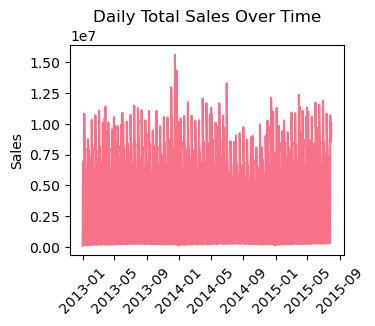

In [38]:
# 1. Sales trend over time
plt.subplot(2, 3, 1)
daily_sales = df_open.groupby('Date')['Sales'].sum().reset_index()
plt.plot(daily_sales['Date'], daily_sales['Sales'])
plt.title('Daily Total Sales Over Time')
plt.xticks(rotation=45)
plt.ylabel('Sales')

Text(0, 0.5, 'Average Sales')

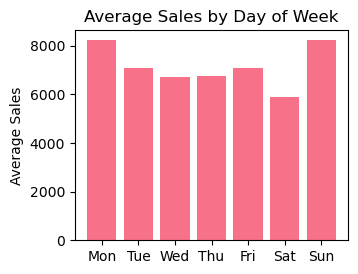

In [39]:
# 2. Sales by day of week
plt.subplot(2, 3, 2)
dow_sales = df_open.groupby('DayOfWeek')['Sales'].mean()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(dow_labels, dow_sales)
plt.title('Average Sales by Day of Week')
plt.ylabel('Average Sales')

Text(0.5, 0, 'Month')

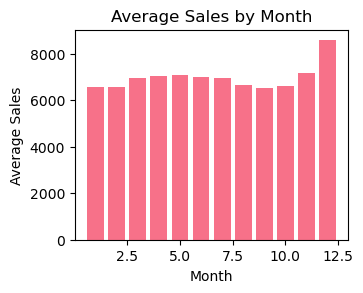

In [15]:
# 3. Sales by month
plt.subplot(2, 3, 3)
monthly_sales = df_open.groupby('Month')['Sales'].mean()
plt.bar(monthly_sales.index, monthly_sales.values)
plt.title('Average Sales by Month')
plt.ylabel('Average Sales')
plt.xlabel('Month')

Text(0, 0.5, 'Frequency')

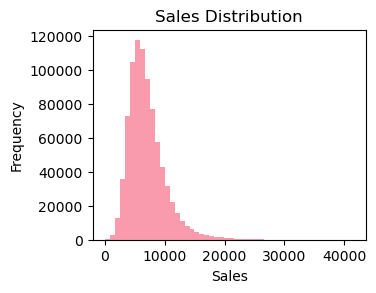

In [16]:
# 4. Sales distribution
plt.subplot(2, 3, 4)
plt.hist(df_open['Sales'], bins=50, alpha=0.7)
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')

Text(0, 0.5, 'Sales')

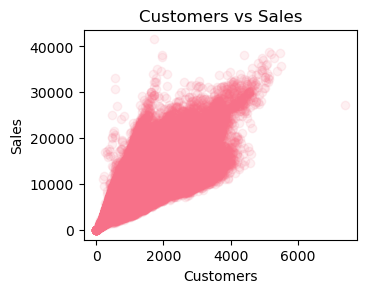

In [17]:
# 5. Customers vs Sales relationship
plt.subplot(2, 3, 5)
plt.scatter(df_open['Customers'], df_open['Sales'], alpha=0.1)
plt.title('Customers vs Sales')
plt.xlabel('Customers')
plt.ylabel('Sales')

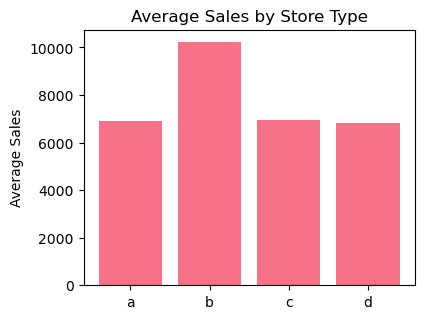

In [18]:
# 6. Store type analysis
plt.subplot(2, 3, 6)
storetype_sales = df_open.groupby('StoreType')['Sales'].mean()
plt.bar(storetype_sales.index, storetype_sales.values)
plt.title('Average Sales by Store Type')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.savefig('../reports/figures/eda_overview.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# Holiday and promotion analysis
print("\n8. HOLIDAY AND PROMOTION ANALYSIS...")

plt.figure(figsize=(15, 5))


8. HOLIDAY AND PROMOTION ANALYSIS...


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

([0, 1, 2, 3],
 [Text(0, 0, 'No Holiday'),
  Text(1, 0, 'Public Holiday'),
  Text(2, 0, 'Easter Holiday'),
  Text(3, 0, 'Christmas')])

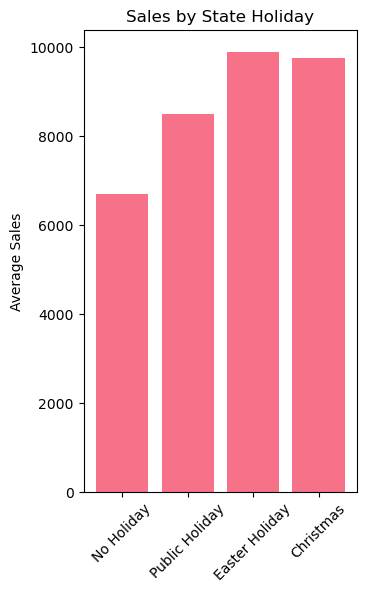

In [20]:
# Holiday impact
plt.subplot(1, 3, 1)
holiday_sales = df_open.groupby('StateHoliday')['Sales'].mean()
plt.bar(['No Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas'], 
        [holiday_sales[0], holiday_sales['a'], holiday_sales['b'], holiday_sales['c']])
plt.title('Sales by State Holiday')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

Text(0, 0.5, 'Average Sales')

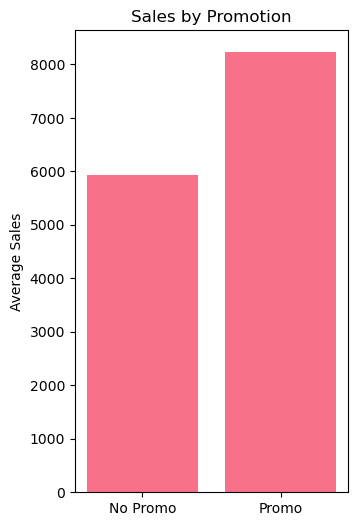

In [21]:
# Promotion impact
plt.subplot(1, 3, 2)
promo_sales = df_open.groupby('Promo')['Sales'].mean()
plt.bar(['No Promo', 'Promo'], promo_sales)
plt.title('Sales by Promotion')
plt.ylabel('Average Sales')

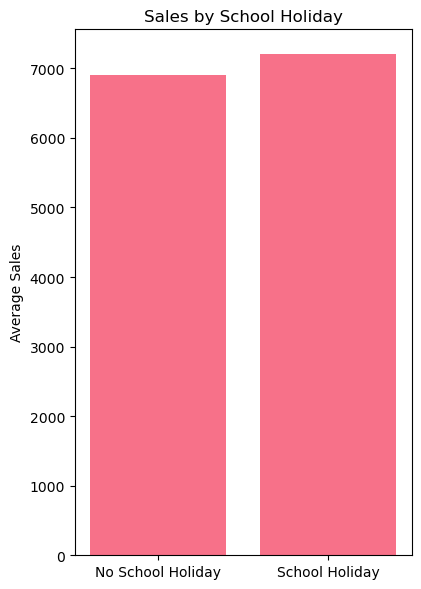

In [22]:
# School holiday impact
plt.subplot(1, 3, 3)
school_holiday_sales = df_open.groupby('SchoolHoliday')['Sales'].mean()
plt.bar(['No School Holiday', 'School Holiday'], school_holiday_sales)
plt.title('Sales by School Holiday')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.savefig('../reports/figures/holiday_promo_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# Store analysis
print("\n9. STORE ANALYSIS...")

plt.figure(figsize=(15, 10))


9. STORE ANALYSIS...


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'Frequency')

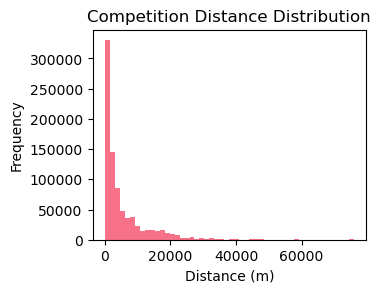

In [24]:
# Competition distance analysis
plt.subplot(2, 3, 1)
df_comp = df_open.dropna(subset=['CompetitionDistance'])
plt.hist(df_comp['CompetitionDistance'], bins=50)
plt.title('Competition Distance Distribution')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Average Sales')

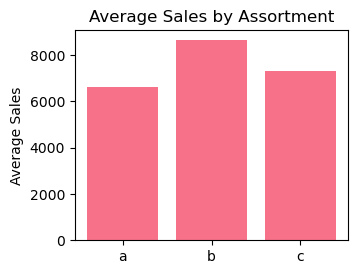

In [25]:
# Sales by assortment
plt.subplot(2, 3, 2)
assort_sales = df_open.groupby('Assortment')['Sales'].mean()
plt.bar(assort_sales.index, assort_sales.values)
plt.title('Average Sales by Assortment')
plt.ylabel('Average Sales')

Text(0.5, 0, 'Store Rank')

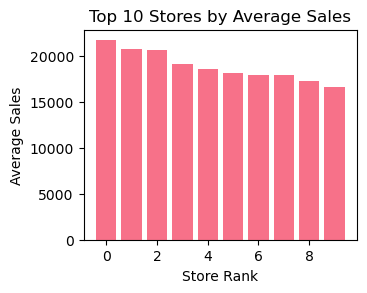

In [26]:
# Top performing stores
plt.subplot(2, 3, 3)
top_stores = df_open.groupby('Store')['Sales'].mean().sort_values(ascending=False).head(10)
plt.bar(range(len(top_stores)), top_stores.values)
plt.title('Top 10 Stores by Average Sales')
plt.ylabel('Average Sales')
plt.xlabel('Store Rank')

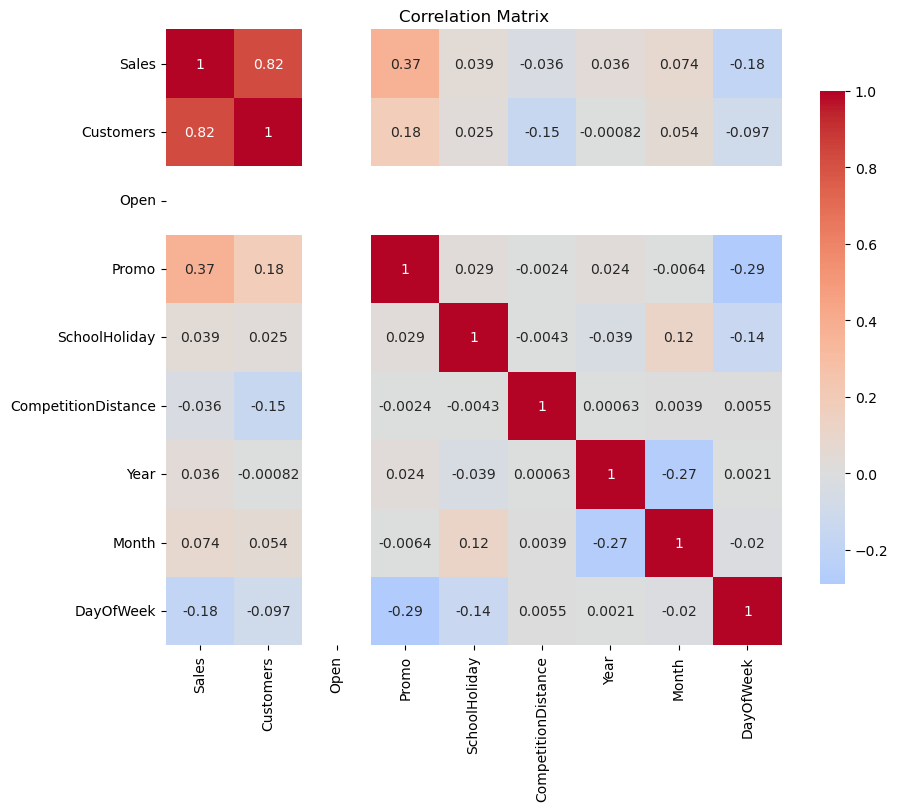

In [36]:
# Sales correlation heatmap
plt.figure(figsize=(10, 8))  
numeric_cols = ['Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 
                'CompetitionDistance', 'Year', 'Month', 'DayOfWeek']

corr_data = df_open[numeric_cols].corr()

sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, 
            square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix')
plt.show()


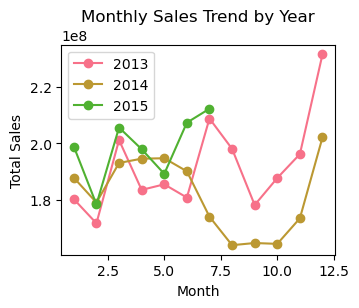

In [28]:
# Monthly trend by year
plt.subplot(2, 3, 5)
monthly_yearly = df_open.groupby(['Year', 'Month'])['Sales'].sum().unstack(0)
for year in monthly_yearly.columns:
    plt.plot(monthly_yearly.index, monthly_yearly[year], marker='o', label=f'{year}')
plt.title('Monthly Sales Trend by Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()

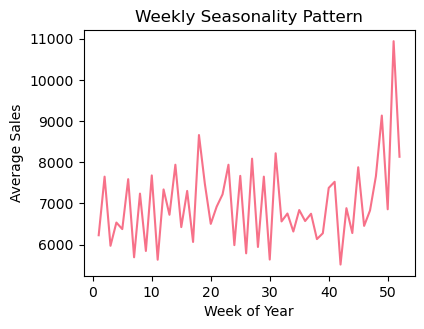

In [29]:
# Weekly seasonality
plt.subplot(2, 3, 6)
weekly_pattern = df_open.groupby('WeekOfYear')['Sales'].mean()
plt.plot(weekly_pattern.index, weekly_pattern.values)
plt.title('Weekly Seasonality Pattern')
plt.xlabel('Week of Year')
plt.ylabel('Average Sales')

plt.tight_layout()
plt.savefig('../reports/figures/store_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# Key insights summary
print("\n10. KEY INSIGHTS SUMMARY...")
print("=" * 60)

print("SALES PATTERNS:")
print(f"   • Average daily sales: €{df_open['Sales'].mean():.2f}")
print(f"   • Highest sales day: {dow_labels[dow_sales.idxmax()]} (€{dow_sales.max():.2f})")
print(f"   • Lowest sales day: {dow_labels[dow_sales.idxmin()]} (€{dow_sales.min():.2f})")
print(f"   • Peak sales month: {monthly_sales.idxmax()} (€{monthly_sales.max():.2f})")

print("\n BUSINESS DRIVERS:")
print(f"   • Promotion impact: {promo_sales[1]/promo_sales[0]:.1f}x higher sales")
print(f"   • Customer-Sales correlation: {df_open[['Customers', 'Sales']].corr().iloc[0,1]:.3f}")
print(f"   • Weekend sales impact: {df_open[df_open['IsWeekend']==1]['Sales'].mean()/df_open[df_open['IsWeekend']==0]['Sales'].mean():.2f}x")

print("\n STORE INSIGHTS:")
print(f"   • Total stores: {df_open['Store'].nunique()}")
print(f"   • Best performing store type: {storetype_sales.idxmax()} (€{storetype_sales.max():.2f})")
print(f"   • Date range: {df_open['Date'].min().strftime('%Y-%m-%d')} to {df_open['Date'].max().strftime('%Y-%m-%d')}")


10. KEY INSIGHTS SUMMARY...
SALES PATTERNS:
   • Average daily sales: €6955.51
   • Highest sales day: Sun (€8224.72)
   • Lowest sales day: Sat (€5874.84)
   • Peak sales month: 12 (€8608.96)

 BUSINESS DRIVERS:
   • Promotion impact: 1.4x higher sales
   • Customer-Sales correlation: 0.824
   • Weekend sales impact: 0.83x

 STORE INSIGHTS:
   • Total stores: 1115
   • Best performing store type: b (€10231.41)
   • Date range: 2013-01-01 to 2015-07-31


In [31]:
# Save processed data for modeling
print("\n11. SAVING PROCESSED DATA...")
df_processed = df_open.copy()


11. SAVING PROCESSED DATA...


In [32]:
# Create additional features for modeling
df_processed['SalesPer1000Customers'] = (df_processed['Sales'] / df_processed['Customers']) * 1000
df_processed['CompetitionDistance_km'] = df_processed['CompetitionDistance'] / 1000
df_processed['IsHoliday'] = (df_processed['StateHoliday'] != '0').astype(int)

In [33]:
# Fill missing values for competition distance
df_processed['CompetitionDistance'].fillna(df_processed['CompetitionDistance'].median(), inplace=True)
df_processed['CompetitionOpenSinceMonth'].fillna(1, inplace=True)
df_processed['CompetitionOpenSinceYear'].fillna(2000, inplace=True)

In [34]:
# Save to processed folder
df_processed.to_csv('../data/processed/rossmann_processed.csv', index=False)
print(f"Processed data saved: {df_processed.shape}")

Processed data saved: (844392, 26)
